## 0. Učitavanje podataka

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data_cleaned.csv")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0.0,...,7.0,437.63,3.0,Amex,65.0,883.17,Biometric,0.8494,0.0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0.0,...,13.0,478.76,4.0,Mastercard,186.0,2203.36,Password,0.0959,0.0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4.0,Visa,226.0,1909.29,Biometric,0.8400,0.0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4.0,Visa,76.0,1311.86,OTP,0.7935,0.0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4.0,Mastercard,140.0,966.98,Password,0.3819,1.0,1


### 0.1 Izbacivanje monotonih i konstantnih značajki

In [2]:
X = df.drop(["Transaction_ID", "User_ID", "Timestamp"], axis=1)
X.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0.0,0.0,7.0,437.63,3.0,Amex,65.0,883.17,Biometric,0.8494,0.0,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0.0,0.0,13.0,478.76,4.0,Mastercard,186.0,2203.36,Password,0.0959,0.0,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0.0,0.0,14.0,50.01,4.0,Visa,226.0,1909.29,Biometric,0.8400,0.0,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0.0,0.0,8.0,182.48,4.0,Visa,76.0,1311.86,OTP,0.7935,0.0,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0.0,1.0,14.0,328.69,4.0,Mastercard,140.0,966.98,Password,0.3819,1.0,1


### 0.2 Pretvorba kategoričkih u numeričke značajke

In [3]:
X = pd.get_dummies(X, dtype=int)
X.head()

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,...,Merchant_Category_Restaurants,Merchant_Category_Travel,Card_Type_Amex,Card_Type_Discover,Card_Type_Mastercard,Card_Type_Visa,Authentication_Method_Biometric,Authentication_Method_OTP,Authentication_Method_PIN,Authentication_Method_Password
0,39.79,93213.17,0.0,0.0,7.0,437.63,3.0,65.0,883.17,0.8494,...,0,1,1,0,0,0,1,0,0,0
1,1.19,75725.25,0.0,0.0,13.0,478.76,4.0,186.0,2203.36,0.0959,...,0,0,0,0,1,0,0,0,0,1
2,28.96,1588.96,0.0,0.0,14.0,50.01,4.0,226.0,1909.29,0.8400,...,1,0,0,0,0,1,1,0,0,0
3,254.32,76807.20,0.0,0.0,8.0,182.48,4.0,76.0,1311.86,0.7935,...,0,0,0,0,0,1,0,1,0,0
4,31.28,92354.66,0.0,1.0,14.0,328.69,4.0,140.0,966.98,0.3819,...,0,0,0,0,1,0,0,0,0,1


In [4]:
X = X.drop("Fraud_Label", axis=1)
y = df.Fraud_Label

## 1. Metoda unakrsne provjere

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from tabulate import tabulate

def cross_validation(X, y):
    
    estimators = [GaussianNB(),LogisticRegression(), RandomForestClassifier(), ExtraTreesClassifier(), XGBClassifier()]
    
    algorithms = []
    results = []
    averages = []
    
    for estimator in estimators:
        algorithms.append(estimator.__class__.__name__)
        result = cross_val_score(estimator=estimator,X=X, y=y, cv=5, scoring='f1', n_jobs=-1)
        results.extend(result)
        averages.append(result.mean()) 
        
    table = {
    "Algorithm": algorithms,
    "Fold 1": [results[x] for x in range(0,25,5)],
    "Fold 2": [results[x] for x in range(1,25,5)],
    "Fold 3": [results[x] for x in range(2,25,5)],
    "Fold 4": [results[x] for x in range(3,25,5)],
    "Fold 5": [results[x] for x in range(4,25,5)],
    "Average": averages
    }

    print(tabulate(table, headers='keys'))
    

In [6]:
cross_validation(X, y)

Algorithm                 Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Average
----------------------  --------  --------  --------  --------  --------  ---------
GaussianNB              0.756319  0.765188  0.765909  0.765413  0.764019   0.763369
LogisticRegression      0.487832  0.502234  0.47889   0.494268  0.497129   0.492071
RandomForestClassifier  1         0.999689  0.999689  1         0.999689   0.999813
ExtraTreesClassifier    0.971602  0.978966  0.979256  0.981514  0.976168   0.977501
XGBClassifier           0.998136  0.998443  0.999533  0.999378  0.998601   0.998818


### 1.1 Skalirani podaci

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

cross_validation(X_scaled, y)

Algorithm                 Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Average
----------------------  --------  --------  --------  --------  --------  ---------
GaussianNB              0.813039  0.825533  0.821696  0.829276  0.819308   0.82177
LogisticRegression      0.685864  0.692195  0.674901  0.687974  0.679045   0.683996
RandomForestClassifier  1         0.999689  0.999689  1         0.999689   0.999813
ExtraTreesClassifier    0.97813   0.976153  0.982495  0.976995  0.979915   0.978737
XGBClassifier           0.998136  0.998443  0.999533  0.999378  0.998601   0.998818


Najbolju prosječnu f1 mjeru dao je algoritam slučajne šume te ona iznosi 0.999782.

## 2. Izgradnja značajki

### 2.1 Domenske značajke

In [8]:
df["Cash"] = (df["Transaction_Type"] == "ATM Withdrawal").astype(int)

df["Transaction_Distance_Risk_Score"] = df["Transaction_Distance"] * df["Risk_Score"]

df["Account_Balance_Percent"] = df["Transaction_Amount"] / df["Account_Balance"]

df["Safe_method"] = ((df["Authentication_Method"] == "OTP") | (df["Authentication_Method"] == "Biometric")).astype(int)

df["High_Risk_Score"] = (df["Risk_Score"] > 0.8).astype(int)

df["High_Failed_Transaction_Count"] = (df["Failed_Transaction_Count_7d"] == 4).astype(int)

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Night"] = ((df.Timestamp.dt.hour >= 23) | (df.Timestamp.dt.hour <= 5)).astype(int)

### 2.2 Povijesne značajke

In [9]:
most_common_locations = df.groupby("User_ID")["Location"].agg(lambda x: x.mode().iloc[0])
df["Common_Location"] = (df["Location"] == df["User_ID"].map(most_common_locations)).astype(int)

most_common_merchant = df.groupby("User_ID")["Merchant_Category"].agg(lambda x: x.mode().iloc[0])
df["Common_Merchandise"] = (df["Merchant_Category"] == df["User_ID"].map(most_common_merchant)).astype(int)

most_common_device = df.groupby("User_ID")["Device_Type"].agg(lambda x: x.mode().iloc[0])
df["Common_Device"] = (df["Device_Type"] == df["User_ID"].map(most_common_device)).astype(int)

df["Transaction_Amount_Deviation"] = np.abs(df["Transaction_Amount"]  - df["Avg_Transaction_Amount_7d"]) / df["Avg_Transaction_Amount_7d"]

df["Failed_Transaction_Ration"] = df["Failed_Transaction_Count_7d"] / (df["Daily_Transaction_Count"] * 7)

In [10]:
X_new = df.drop(["Transaction_ID", "User_ID", "Timestamp"], axis=1)
X_new = pd.get_dummies(X_new, dtype=int)

X_new = X_new.drop("Fraud_Label", axis=1)
X_new_scaled = scaler.fit_transform(X_new)
X_new_scaled = pd.DataFrame(X_new_scaled, columns=X_new.columns)

In [11]:
cross_validation(X_new_scaled, y)

Algorithm                 Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Average
----------------------  --------  --------  --------  --------  --------  ---------
GaussianNB              0.915023  0.916252  0.789602  0.922324  0.915054   0.891651
LogisticRegression      0.980781  0.985427  0.982124  0.981074  0.98437    0.982755
RandomForestClassifier  0.999844  0.999689  0.999689  0.999844  0.999689   0.999751
ExtraTreesClassifier    0.986794  0.986028  0.983918  0.984064  0.984667   0.985094
XGBClassifier           0.998136  0.998911  0.999533  0.999067  0.998445   0.998818


Najbolju prosječnu f1 mjeru dao je algoritam slučajne šume te ona iznosi 0.999813.

## 3. Metode omotača

### 3.1 Odabir značajki

In [12]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label', 'Cash', 'Transaction_Distance_Risk_Score',
       'Account_Balance_Percent', 'Safe_method', 'High_Risk_Score',
       'High_Failed_Transaction_Count', 'Night', 'Common_Location',
       'Common_Merchandise', 'Common_Device', 'Transaction_Amount_Deviation',
       'Failed_Transaction_Ration'],
      dtype='object')

In [13]:
X_starting = df[["Transaction_Amount", "Account_Balance", "IP_Address_Flag", "Previous_Fraudulent_Activity", "Daily_Transaction_Count", "Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d", "High_Risk_Score", "Transaction_Distance", "Risk_Score", "Failed_Transaction_Ration",
                "High_Failed_Transaction_Count", "Night", "Safe_method", "Common_Location"]]
X_starting = pd.DataFrame(X_starting, columns=X_starting.columns)
X_starting = pd.get_dummies(X_starting, dtype=int)
X_starting_scaled = scaler.fit_transform(X_starting)
X_starting_scaled = pd.DataFrame(X_starting_scaled, columns=X_starting.columns)

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

while X_starting_scaled.shape[1] > 12:
    highest_f1 = -1
    feature_excluded = -1
    for feature in X_starting_scaled.columns:
        X_without_feature = X_starting_scaled.drop(feature, axis=1)
        model = LinearSVC().fit(X_without_feature, y)
        predicts = model.predict(X_without_feature)
        f1 = f1_score(y, predicts)
        if f1 > highest_f1:
            highest_f1 = f1
            feature_excluded = feature   
    X_starting_scaled.drop(feature_excluded, axis=1, inplace=True)
        

In [15]:
X_starting_scaled.columns

Index(['IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'High_Risk_Score',
       'Transaction_Distance', 'Risk_Score', 'High_Failed_Transaction_Count',
       'Night', 'Safe_method', 'Common_Location'],
      dtype='object')

In [16]:
cross_validation(X_starting_scaled, y)

Algorithm                 Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Average
----------------------  --------  --------  --------  --------  --------  ---------
GaussianNB              0.939509  0.951422  0.767727  0.940041  0.945      0.90874
LogisticRegression      0.980034  0.985276  0.982424  0.980925  0.983471   0.982426
RandomForestClassifier  0.999844  0.999689  0.999689  1         0.999689   0.999782
ExtraTreesClassifier    0.997357  0.99829   0.996422  0.996894  0.996582   0.997109
XGBClassifier           0.99798   0.998911  0.999533  0.999534  0.998757   0.998943


Prosječna f1 mjera za naivan bayesov klasifikator se povećala, dok je za preostale klasifikatore ostala jednaka.
Najbolju prosječnu f1 mjeru dao je algoritam slučajne šume te ona iznosi 0.999782.

## 4. SHAP

### 4.1 Odabir osobe

In [17]:
user_counts = df['User_ID'].value_counts()
selected_user_id = user_counts[user_counts == 10].index[0]
user_samples = X_starting_scaled.to_numpy()[df.index[df["User_ID"] == selected_user_id]]
user_samples_predictions = df.loc[df["User_ID"] == selected_user_id, "Fraud_Label"].to_numpy()
user_samples = pd.DataFrame(user_samples, columns=X_starting_scaled.columns)

[[ 2.06910275e-05 -2.06910275e-05]
 [ 5.52783561e-06 -5.52783561e-06]
 [ 3.13507921e-04 -3.13507921e-04]
 [ 2.99342708e-04 -2.99342708e-04]
 [ 7.76134445e-02 -7.76134445e-02]
 [ 2.69538535e-02 -2.69538535e-02]
 [ 7.17688365e-05 -7.17688365e-05]
 [ 1.07766744e-01 -1.07766744e-01]
 [ 1.08326175e-01 -1.08326175e-01]
 [ 5.59614401e-04 -5.59614401e-04]
 [-3.36264865e-04  3.36264865e-04]
 [-1.80032871e-04  1.80032871e-04]]
Predicted = 0, True = 1


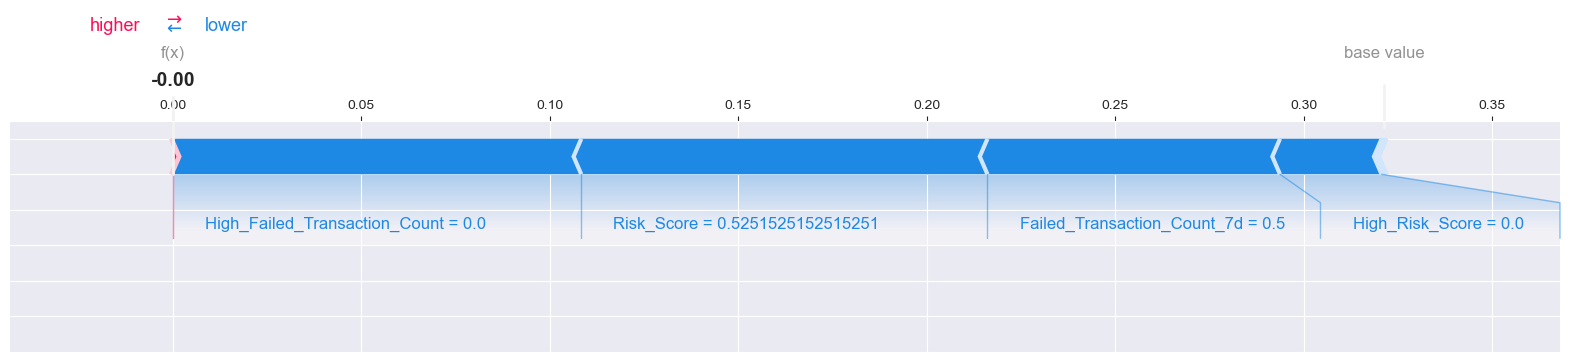

Predicted = 0, True = 0


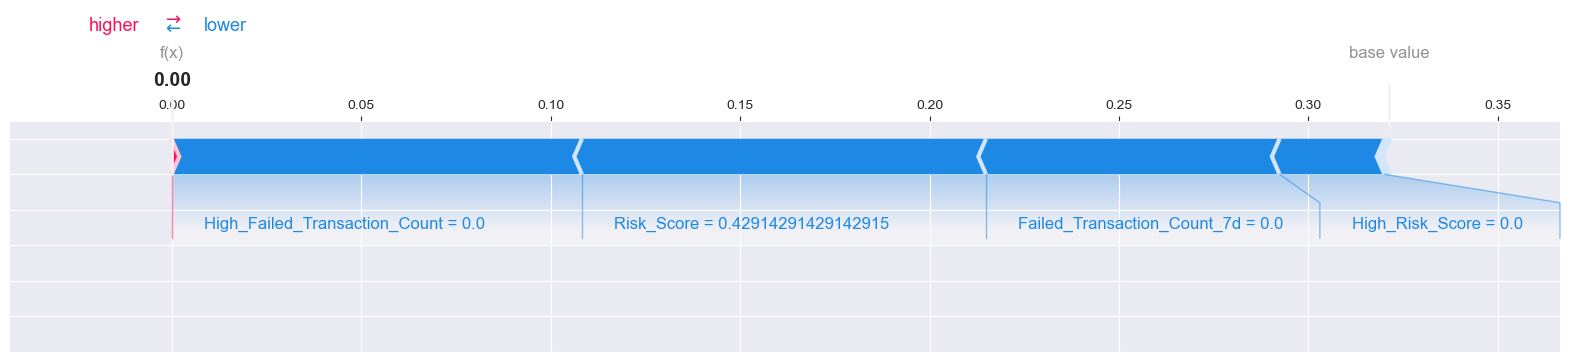

Predicted = 0, True = 1


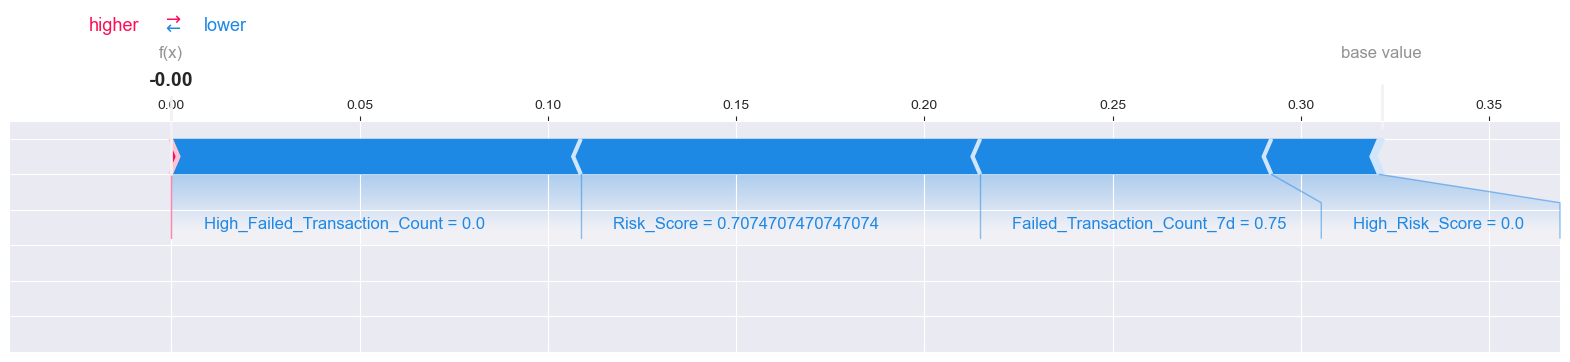

Predicted = 0, True = 0


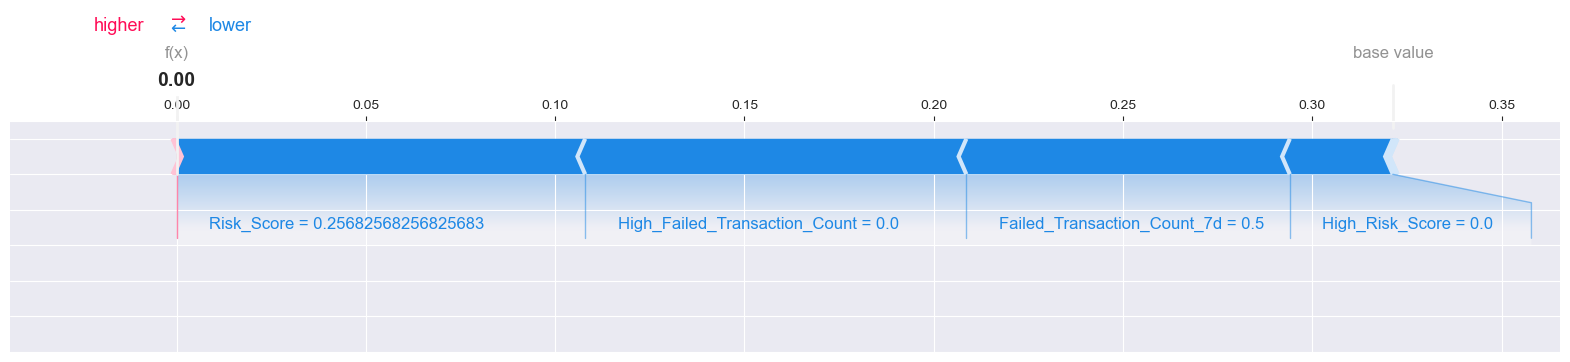

Predicted = 0, True = 1


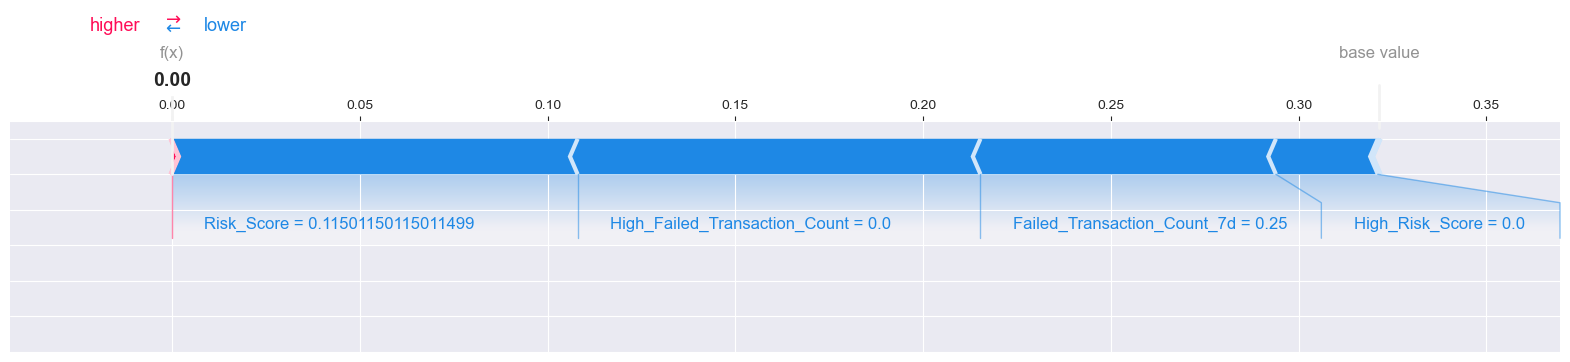

Predicted = 1, True = 1


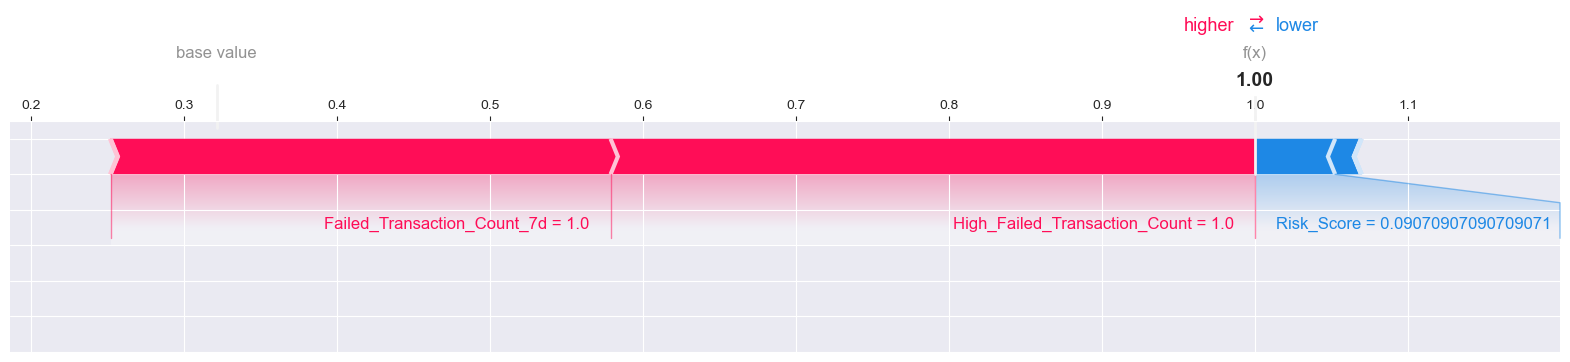

Predicted = 0, True = 0


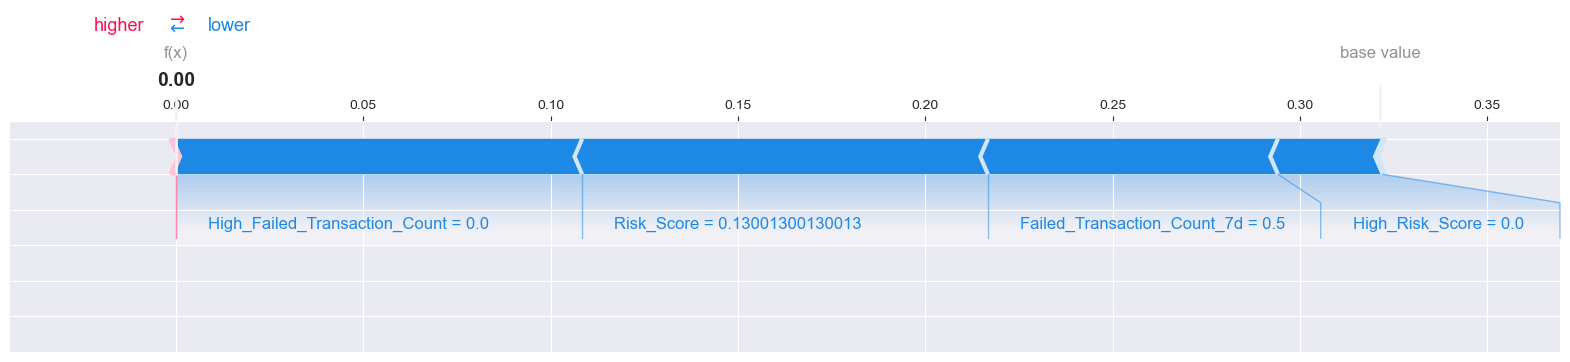

Predicted = 0, True = 1


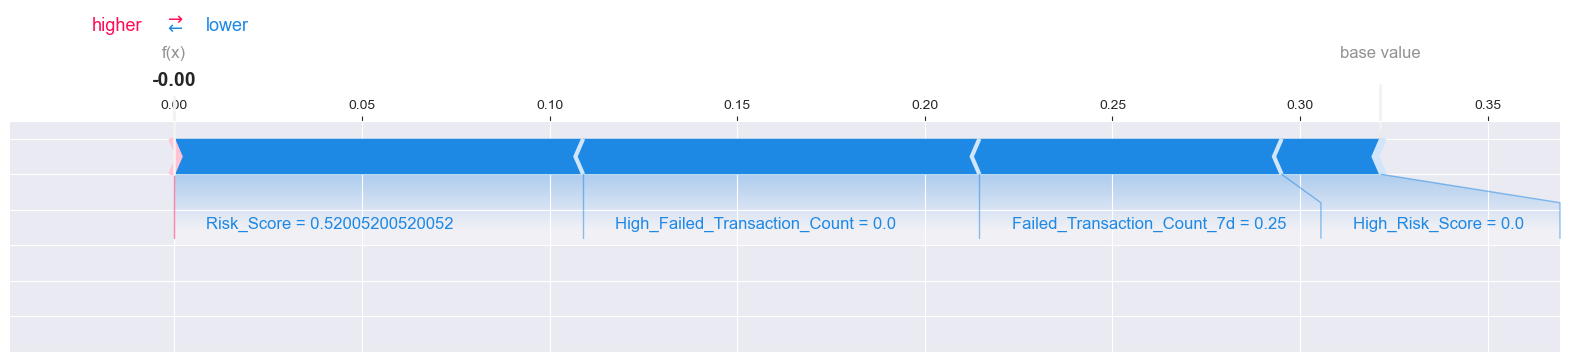

Predicted = 0, True = 0


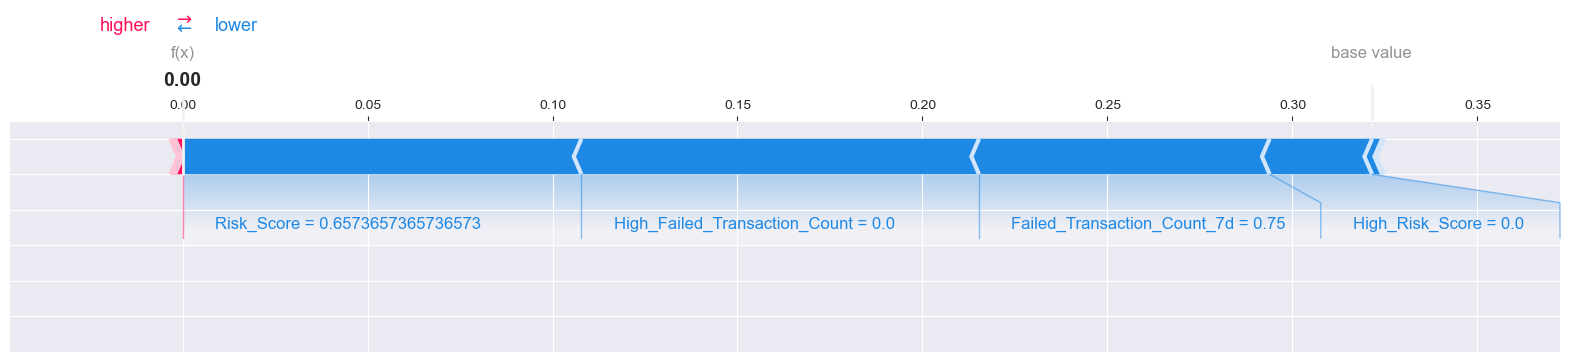

Predicted = 1, True = 0


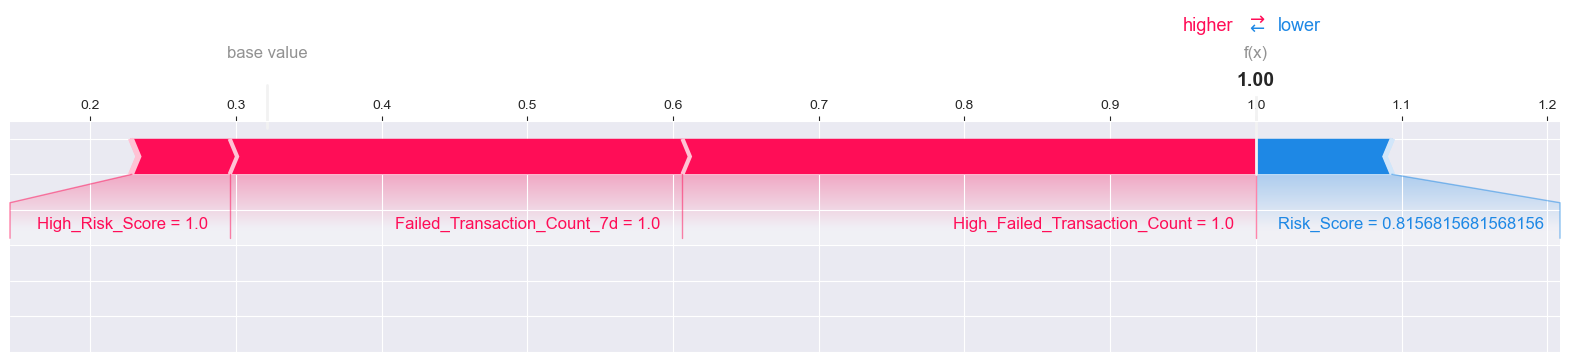

In [23]:
import shap
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_starting_scaled, y)

explainer = shap.TreeExplainer(rf)

user_shap_values = explainer(user_samples)
user_predictions = rf.predict(user_samples)

print(user_shap_values[0].values)

for i in range(len(user_samples)):
    print(f"Predicted = {user_predictions[i]}, True = {user_samples_predictions[i]}")
    shap.plots.force(
        user_shap_values[i, :, 1], 
        matplotlib=True
    )
    plt.show()

Najveći utjecaj na odluku klasifikatora imaju značajke "High_Failed_Transaction_Count" te "High_Risk_Score". U slučaju da jedna značajka True, klasifikator označava transakciju kao prevaru.

## 5. RIPPER

In [19]:
import wittgenstein as lw
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = lw.RIPPER()
model.fit(X_train, y_train)
score = model.score(X_test, y_test, f1_score)
print("F1 Score:", score)
print("Rules:")
model.out_model()

F1 Score: 0.9445640473627557
Rules:
[[Failed_Transaction_Count_7d=4.0] V
[Risk_Score=>0.9] V
[Risk_Score=0.8-0.9] V
[Transaction_Amount=>228.3 ^ Account_Balance=<10200.23 ^ Card_Type_Discover=1 ^ Failed_Transaction_Count_7d=0.0 ^ Transaction_Type_Online=1]]


Algoritam je dao 3 jednostavna pravila koja nam govore je li transakcija prevara.
Prvo pravilo govori da ako je broj neuspjelih transakcija u zadnjih tjedan dana jednak 4 (najveći broj u skupu podataka) transakcija je prevara. Drugo i treće pravilo se može objediniti u jedno pravilo koje nam u slučaju kada je vrijednost značajke "Risk_Score" >= 0.8 označava transakciju kao prevaru.

In [20]:
from sklearn.model_selection import GridSearchCV

parameters =  {'k': [1, 2, 3], 'prune_size':[0.25, 0.33, 0.40], 'dl_allowance':[50,64,75]}
model = GridSearchCV(lw.RIPPER(), parameters, n_jobs=-1)
model.fit(X_train, y_train)
best_estimator = model.best_estimator_
score = best_estimator.score(X_test, y_test, f1_score)
print("Best parameters:")
print(model.best_params_)
print("F1 Score:", score)
print("Rules:")
best_estimator.out_model()


KeyboardInterrupt



In [ ]:
model = lw.RIPPER(max_rules=3, max_rule_conds=2)
model.fit(X_train, y_train)
score = model.score(X_test, y_test, f1_score)
print("F1 Score:", score)
print("Rules:")
model.out_model()

Nema promjene u pravilima.

Ripper algoritam ima veću f1 mjeru nego naivan bayesov klasifikator, a manju od ostalih klasifikatora.

Prednosti:
- dobro radi  s numeričkim prediktivnim značajkama
- nalazi kompaktan skup korisnih pravila
- radi brzo na relativno velikom skupu podataka

Nedostaci:
- ako je problem složen (uvjeti pokrivaju mali broj primjera), nema garancije da će pronaći korisna pravila